In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras import Model

# load the TensorBoard notebook extension.
%load_ext tensorboard

tf.keras.backend.set_floatx('float64')

mnist = tf.keras.datasets.mnist

# load and scale the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(50)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

In [2]:
from datetime import datetime
from packaging import version
import tensorboard
tensorboard.__version__
!rm -rf ./logs/

In [3]:
x_train.shape

(60000, 28, 28, 1)

In [4]:
inputs = tf.keras.Input(shape=(28, 28, 1))

In [5]:
inputs.shape

TensorShape([None, 28, 28, 1])

In [6]:
x = Conv2D(32, 5, activation='relu')(inputs)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Conv2D(64, 5, activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2, seed=8)(x)
outputs = Dense(10, activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs, name='MNIST_model')

In [7]:
model.summary()

Model: "MNIST_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              

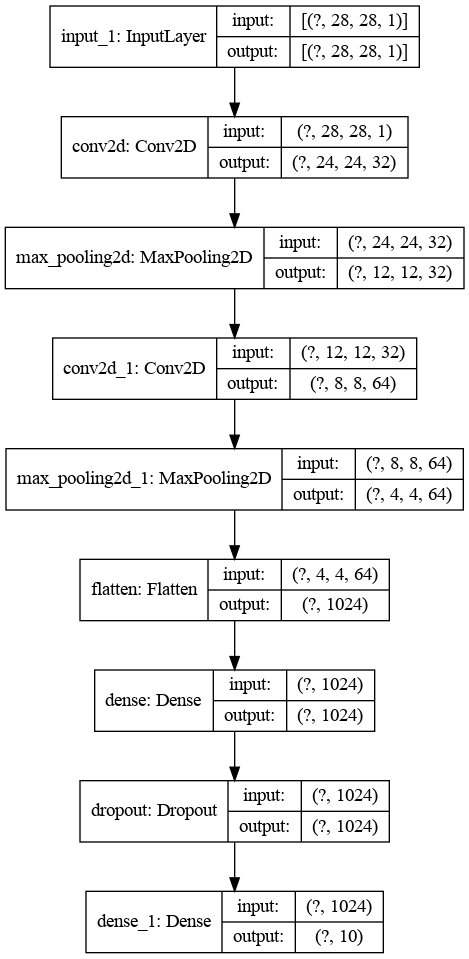

In [9]:
tf.keras.utils.plot_model(model, "2conv_layers_model.png", show_shapes=True)

In [10]:
# make a loss object and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss=loss_object, metrics=['sparse_categorical_accuracy'])

# define the Keras TensorBoard callback
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [11]:
import time
tic = time.perf_counter()

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=3, callbacks=[tensorboard_callback])

print('\n history dict:', history.history)

toc = time.perf_counter()

print('Time: {}\n'.format(toc-tic))

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 181s 3ms/sample - loss: 0.1549 - sparse_categorical_accuracy: 0.9527
Epoch 2/3
60000/60000 [==============================] - 177s 3ms/sample - loss: 0.0447 - sparse_categorical_accuracy: 0.9861
Epoch 3/3
60000/60000 [==============================] - 178s 3ms/sample - loss: 0.0303 - sparse_categorical_accuracy: 0.9906

 history dict: {'loss': [0.1549344110141944, 0.044725627991189475, 0.03030745974918809], 'sparse_categorical_accuracy': [0.9526666666666667, 0.9861333333333333, 0.9906]}
Time: 537.6410396380088



In [12]:
print('\n# Evaluate on test data')
results = model.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
10000/10000 [==============================] - 12s 1ms/sample - loss: 0.0304 - sparse_categorical_accuracy: 0.9905
test loss, test acc: [0.03036101191239698, 0.9905]


In [13]:
#%tensorboard --logdir logs

In [14]:
# save the model
model.save("Models/")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Models/assets


In [15]:
# load the saved model
model2 = tf.keras.models.load_model("Models/")

In [16]:
model2.summary()

Model: "MNIST_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              

In [17]:
print('\n# Evaluate on test data')
results2 = model2.evaluate(x_test, y_test, batch_size=128)
print('test loss, test acc:', results2)


# Evaluate on test data
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.0304 - sparse_categorical_accuracy: 0.9905
test loss, test acc: [0.030361393025608977, 0.9905]
